## Assignment - 3: High-Dimensional Data Visualization, Feature Extraction & Selection 
### ID: eo9232
### Name: Md Reza
### IE7860 - Winter 2022

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from subprocess import check_output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv')

## Exploratory Data Analysis

In [4]:
data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_grid = data.copy()

In [6]:
# Print the columns' name
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## Data Imputation

In [7]:
# Check for Null values
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
print("Number of rows with 0 values for each variable")
for col in data.columns:
    missing_rows = data.loc[data[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [9]:
# Replace '0' with nan
data['Glucose'] = data['Glucose'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
data['Insulin'] = data['Insulin'].replace(0, np.nan)
data['BMI'] = data['BMI'].replace(0, np.nan)

In [10]:
# Replace nan with average value
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [11]:
# y includes our labels and x includes our features
y = data.Outcome # 1 or 0 
list = ['Outcome']
x = data.drop(list,axis = 1 )
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


Number of One:  268
Number of Zero:  500


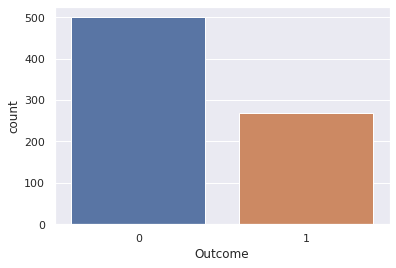

In [12]:
# Print labels count
sns.set_theme(style="darkgrid")
ax = sns.countplot(y,label="Count")
zero, one = y.value_counts()
print('Number of One: ',one)
print('Number of Zero: ',zero)

Examine the data to check if normalizations are required.

In [13]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Data Visualization : Univariate & Pair-Wise Plots, Correlation Map

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

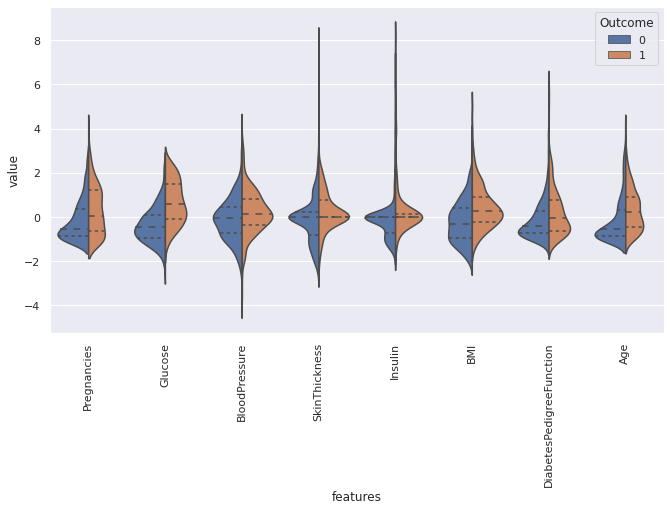

In [14]:
# Violin plot
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_n_2.iloc[:,0:31]],axis=1) # first 10 features
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(11,6))
plot = sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

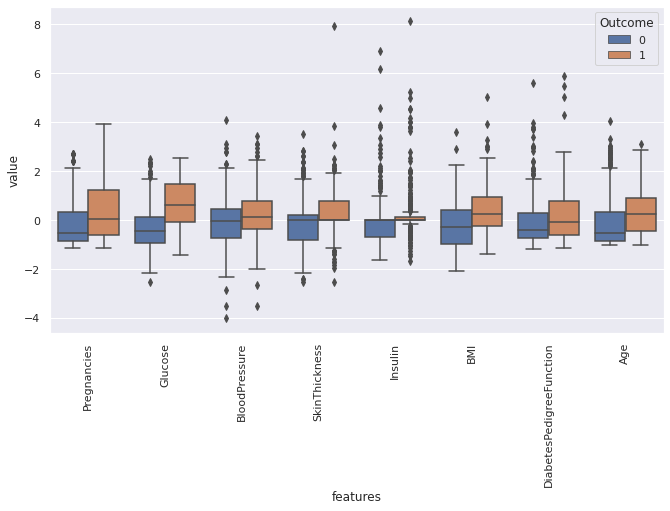

In [15]:
# Box Plot
plt.figure(figsize=(11,6))
sns.boxplot(x="features", y="value", hue="Outcome", data=data)
plot = plt.xticks(rotation=90)

The Boxplot above seems blood pressure and BMI are highly correlated. To understand the correlation deeper, let's use a joint plot. We aren't selecting features yet, just exploring the dataset.

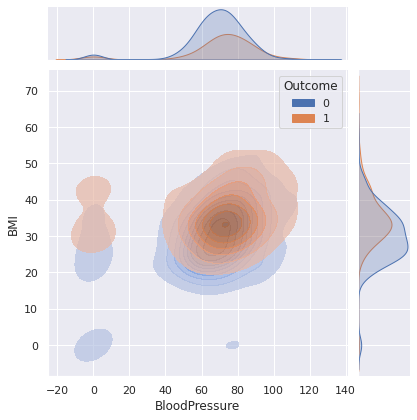

In [16]:
plt = sns.jointplot(data=data_grid, x="BloodPressure", y="BMI", hue = "Outcome", kind='kde', fill=True, joint_kws={'alpha': 0.7})

How about the remaining features? We can use a pair-grid plot to explore more details on the correlations.

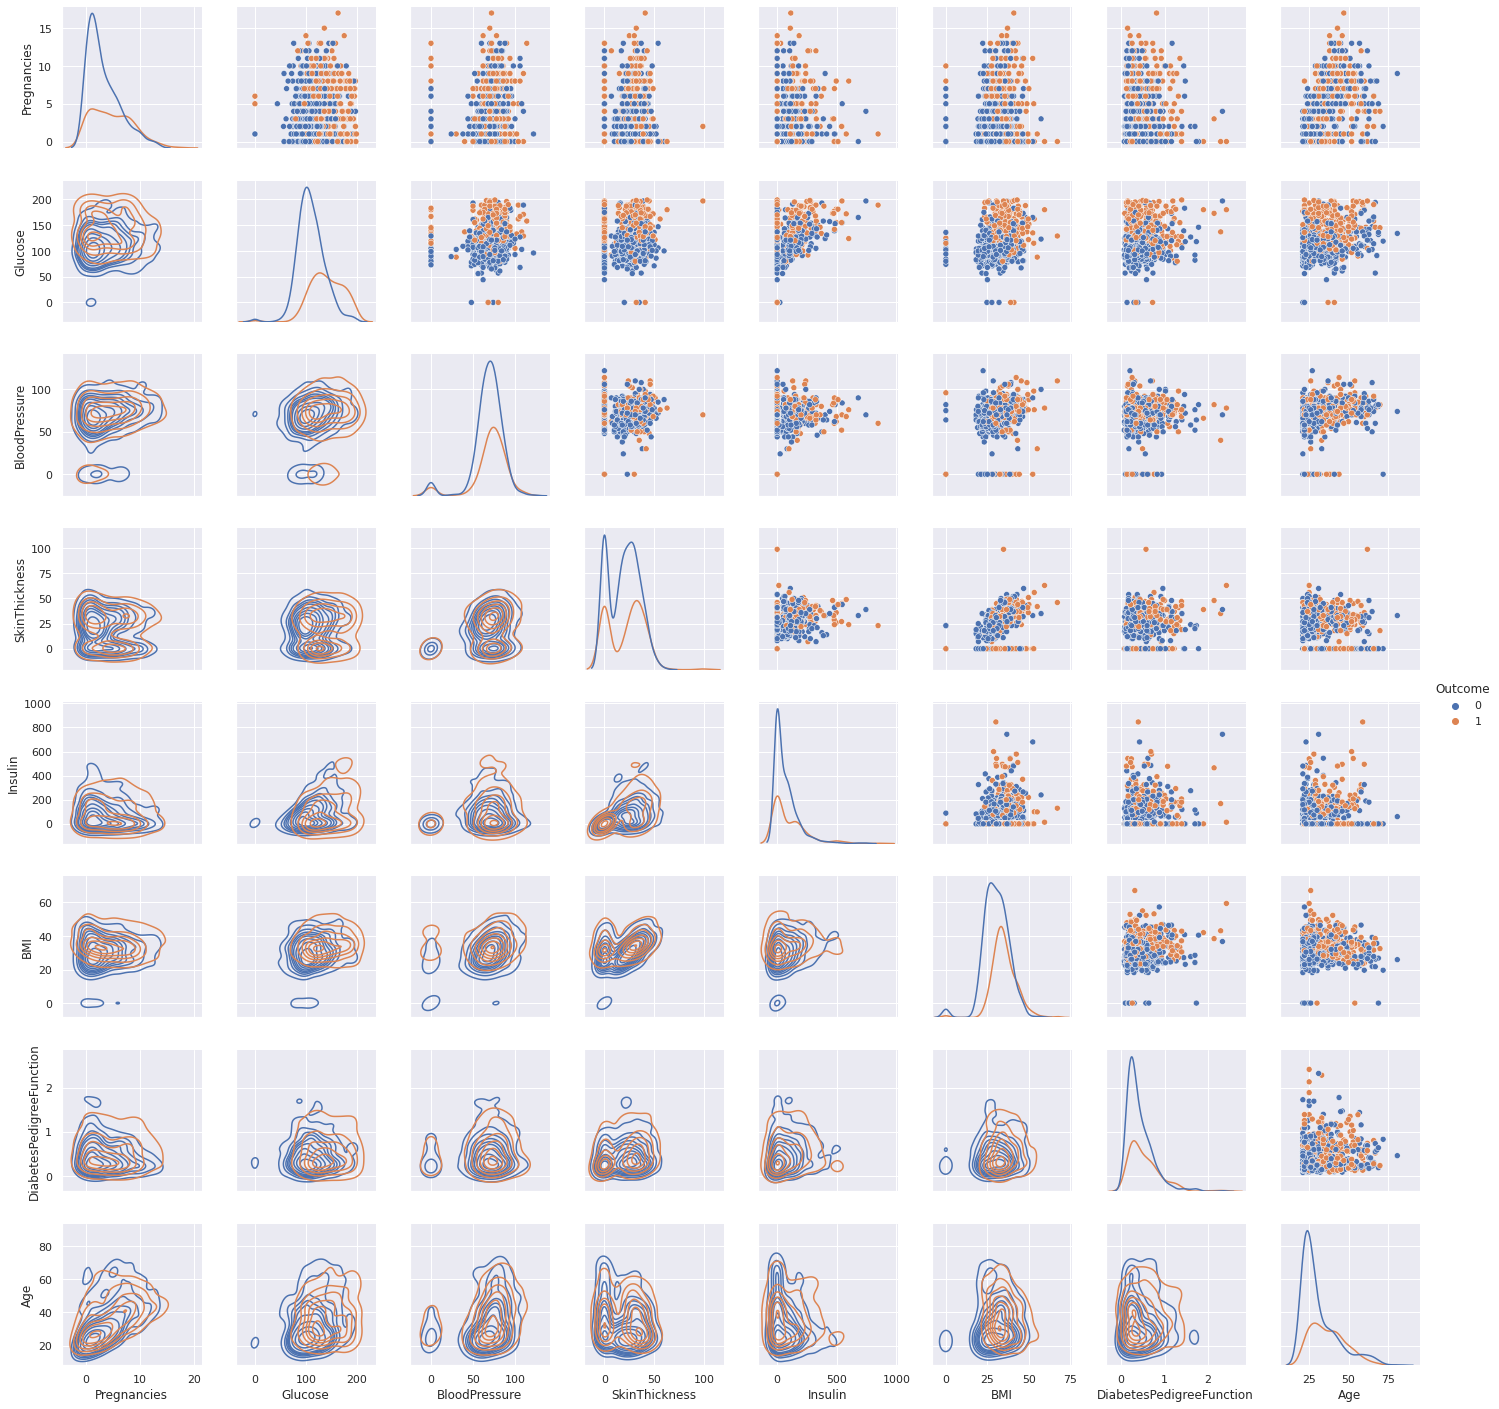

In [17]:
import pandas as pd
import seaborn as sns

g = sns.PairGrid(data_grid, diag_sharey=False, hue="Outcome")
g = g.map_lower(sns.kdeplot)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

From the PairGrid plot above, it is apprehensible that all features carry some weights and possible candidates for building a better model. Probably the swarm plot will help us to learn more.

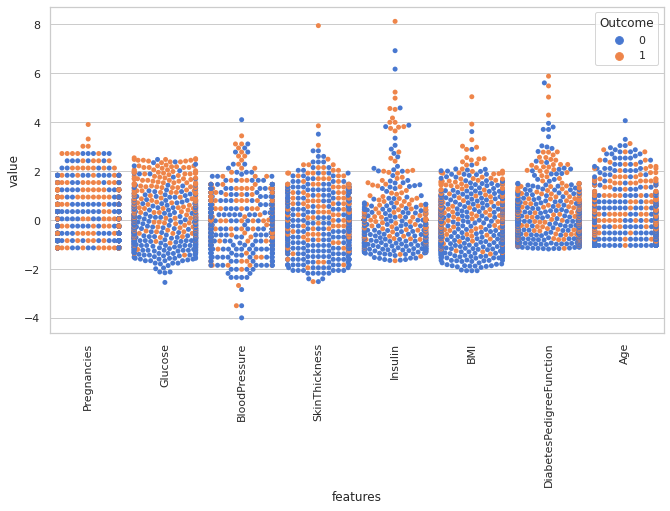

In [18]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([y,data_n_2.iloc[:,0:31]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(11,6))
sns.swarmplot(x="features", y="value", hue="Outcome", data=data)
plt = plt.xticks(rotation=90)

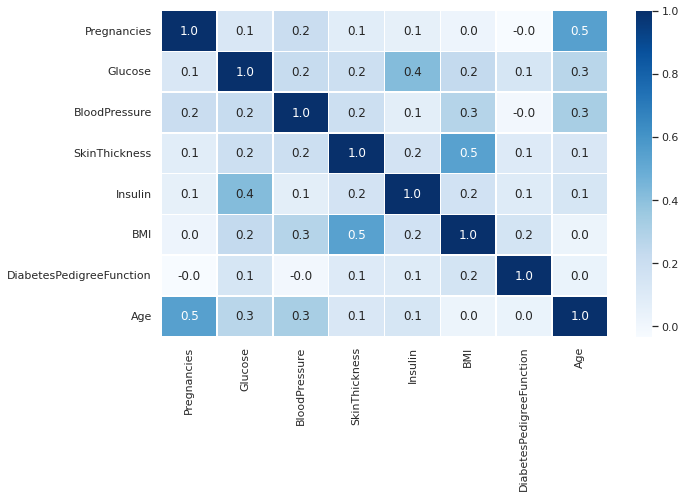

In [19]:
# Correlation map
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(10, 6))
plt = sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,  cmap="Blues")

Finally, with the confusion matrix above and all other plots, it turned out that every feature contributes some weights towards the final model. But let us continue with the actual motivation that is feature selection, in the next preceding steps.

## Visualizing High-Dimensional Data using PCA, *t*-SNE & UMAP

In [20]:
!pip install umap-learn

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap

# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# UMAP 
umap_results = umap.UMAP().fit_transform(x)

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

Explained variation per principal component: [0.86510267 0.0891348  0.02039833 0.01231992]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 12.713917
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.850868
[t-SNE] KL divergence after 300 iterations: 0.639156


In [22]:
# Define function for PCA, UMAP, & tSNE Scatter/Density plot
def scatter_density(data, labels, sca_title='', den_title='', **kwargs):

    fig, ax = plt.subplots(1,2,figsize=(10,4),sharey=True,sharex=True)
    
    dataneg = data[labels == 0]
    datapos = data[labels == 1]
    
    sns.scatterplot(data[:,0], data[:,1],hue=labels, ax=ax[0])

    sns.kdeplot(datapos[:,0], datapos[:,1], ax=ax[1], cmap='Oranges',**kwargs) 
    sns.kdeplot(dataneg[:,0], dataneg[:,1], ax=ax[1], cmap='Blues',n_levels=30,**kwargs,shade=True,shade_lowest=False)

    ax[0].set_title(sca_title)
    ax[1].set_title(den_title)
    
    fig.tight_layout()
    plt.show()
    return ax

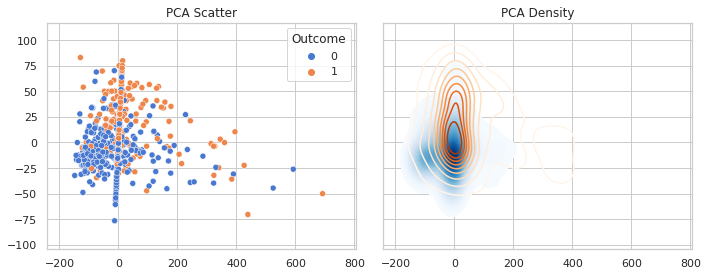

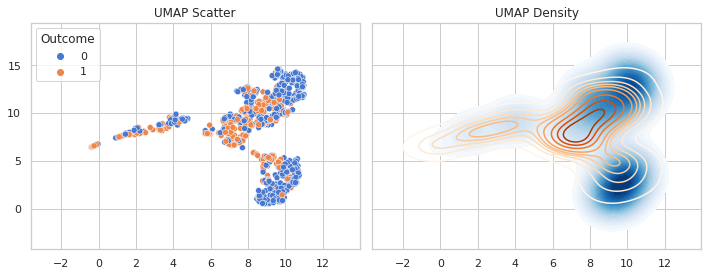

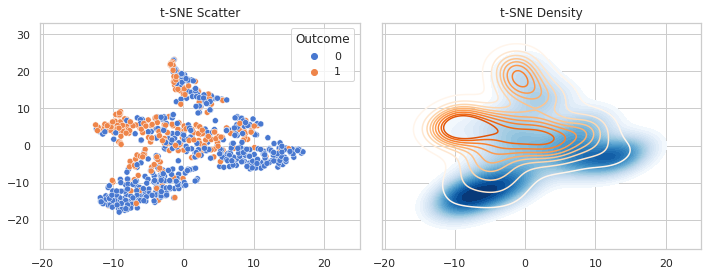

In [23]:
scatter_density(pca_result, y, 'PCA Scatter', 'PCA Density');
scatter_density(umap_results, y, 'UMAP Scatter', 'UMAP Density');
scatter_density(tsne_results, y, 't-SNE Scatter', 't-SNE Density');

# Feature Selection With:
* F-Test, Chi-Square Test, Mutual Information (Univariate Feature Selection)
* Recursive feature elimination with cross validation (RFECV)

## Define Common Function for Baseline, F-Test, Chi-Square Test, & Mutual Information MLP Model and Univariate Feature Selection


In [24]:
def mlp_feature_selection(x_umlp, y, label):

  # Split data into training and testing
  X_train, X_test, y_train, y_test = train_test_split(x_umlp, y, test_size=0.25, random_state=42)

  # Specify Classifier
  mlp = MLPClassifier(max_iter=100)

  # Hyper-parameter to optimize MLP
  parameter_space = {
      'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
      'activation': ['tanh', 'relu'],
      'solver': ['sgd', 'adam'],
      'alpha': [0.0001, 0.05, 0.1],
      'learning_rate': ['constant','adaptive'],
  }

  # Grid Search
  from sklearn.model_selection import GridSearchCV
  clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
  clf.fit(X_train, y_train)

  # Best parameter set
  print('\x1b[1;03;30;1;95m' + label + 'best parameters:\x1b[1;94m\n', clf.best_params_)

  # Make prediction 
  y_true, y_pred = y_test , clf.predict(X_test)

  # Confustion Matrix
  import matplotlib.pyplot as plt
  from sklearn.metrics import f1_score,confusion_matrix
  cm = confusion_matrix(y_true,y_pred)
  plt.title(label + '- Confusion Matrix' , size=14, fontweight="bold")
  plt = sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}, cmap="Blues")

  # Classification Report
  from sklearn.metrics import classification_report
  print('\x1b[1;03;30;1;95m'+ '\nResults on the test set: \x1b[1;94m')
  print(classification_report(y_true, y_pred)) 

## Baseline MLP Model with All Features

Baseline best parameters:
 {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (48, 24), 'learning_rate': 'constant', 'solver': 'adam'}

Results on the test set: 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       123
           1       0.65      0.51      0.57        69

    accuracy                           0.72       192
   macro avg       0.70      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192



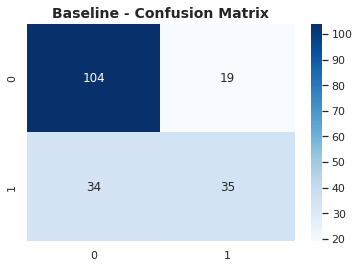

In [25]:
mlp_feature_selection(x, y, 'Baseline ')

## Univariate Feature Selection: F-Test, Chi-Square Test & Mutual Information

In [26]:
def univariate_plot(x, y, param, x_ind, label, color, label_f):
    
# Plot The Best Scores 
  x_new = SelectKBest(param, k=6)
  x_new.fit_transform(x, y)
  scores = x_new.scores_
  scores /= scores.max()
  plt.bar(x_indices - x_ind, scores, width=.20,
        label=label, color=color,
        edgecolor='black')
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
  
  print('\x1b[1;03;30;1;95m\n' + label_f + '\x1b[1;94m\n', x_new.scores_)
  print('\x1b[1;03;30;1;95m\n Feature List: \x1b[1;94m\n', x.columns, '\n')


F-Test Feature Scores List:
 [0.16135343 1.         0.08836701 0.15143974 0.15013264 0.33581182
 0.09709337 0.18767087]

 Feature List: 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object') 


Chi-Square Test Feature Scores List:
 [0.06805716 0.86579355 0.02608903 0.05751535 1.         0.06632331
 0.00329099 0.11064426]

 Feature List: 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object') 


Mutual Information Feature Scores List:
 [0.40820677 1.         0.03960554 0.15620462 0.13589652 0.65491247
 0.09846282 0.34844315]

 Feature List: 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object') 



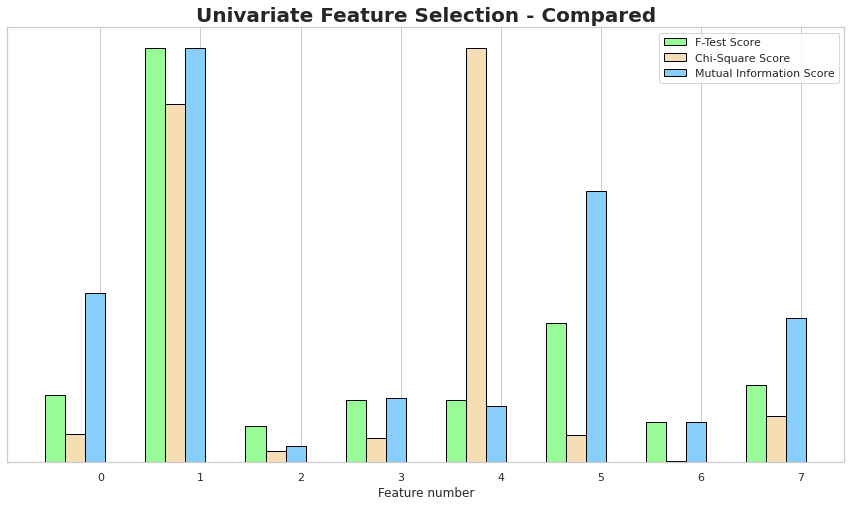

In [27]:
# Print Selected Features
plt.figure(figsize=(15,8)); plt.clf()
x_indices = np.arange(x.shape[-1])

univariate_plot(x, y, f_classif, .45, 'F-Test Score', 'palegreen', 'F-Test Feature Scores List:')
univariate_plot(x, y, chi2, .25, 'Chi-Square Score', 'wheat', 'Chi-Square Test Feature Scores List:')
univariate_plot(x, y, mutual_info_classif, .05, 'Mutual Information Score', 'lightskyblue', 'Mutual Information Feature Scores List:')

plt.title('Univariate Feature Selection - Compared', size=20, fontweight="bold")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

x_new_f = SelectKBest(f_classif, k=6).fit_transform(x, y)
x_new_chi2 = SelectKBest(chi2, k=6).fit_transform(x, y)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(x, y)

### Univariate Feature Selection: F-Test

F-Test best parameters:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}

Results on the test set: 
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       123
           1       0.56      0.64      0.60        69

    accuracy                           0.69       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.70      0.69      0.70       192



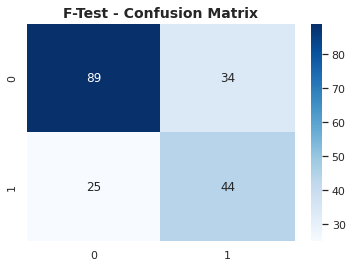

In [28]:
mlp_feature_selection(x_new_f, y, 'F-Test ')

### Univariate Feature Selection: Chi-Square Test

Chi-Square Test best parameters:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'adaptive', 'solver': 'adam'}

Results on the test set: 
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       123
           1       0.54      0.29      0.38        69

    accuracy                           0.66       192
   macro avg       0.61      0.58      0.57       192
weighted avg       0.63      0.66      0.62       192



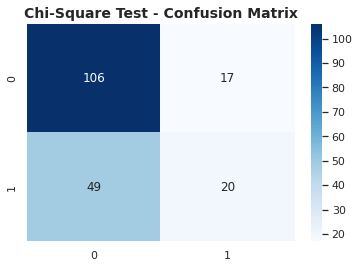

In [29]:
mlp_feature_selection(x_new_chi2, y, 'Chi-Square Test ')

### Univariate Feature Selection: Mutual Information

Mutual Information best parameters:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}

Results on the test set: 
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       123
           1       0.58      0.38      0.46        69

    accuracy                           0.68       192
   macro avg       0.64      0.61      0.61       192
weighted avg       0.66      0.68      0.66       192



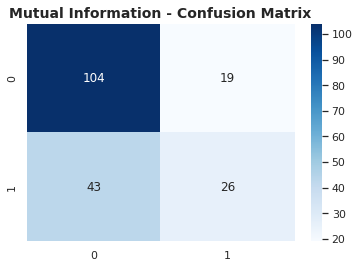

In [30]:
mlp_feature_selection(x_new_mi, y, 'Mutual Information ')

## Recursive Feature Elimination with Cross-Validation

In [31]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create the RFE object 
svc = SVC(kernel="linear")
min_features_to_select = 1 
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(3),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv = rfecv.fit(X_train, y_train)

print('\x1b[1;03;30;1;95m' + 'Optimal Number of Features:\x1b[1;94m\n', rfecv.n_features_)
print('\x1b[1;03;30;1;95m' + 'RFECV Best Features:\x1b[1;94m\n', X_train.columns[rfecv.support_])

Optimal Number of Features:
 5
RFECV Best Features:
 Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


Finally, we can leverage the Recursive Feature Elimination in a cross-validation (RFECV) loop to find the optimal features. With REFCV, we find the best features and discover how many features we need for the best accuracy. Given that MLP does not have a provision to expose "coef_" or "feature importance" attributes, we must use an alternate classifier. I have used SVC with a linear kernel to find the best optimal parameters here. It turns out that the F1-Score has a positive impact on the optimal feature and increased exponentially. Refer to the Model Summary in the Appendix section below for details on models' performance.


Results on the test set: 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.59      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



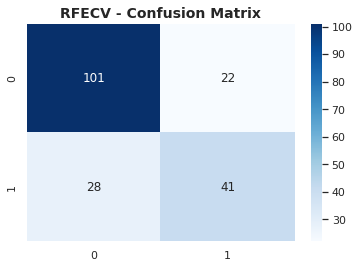

In [32]:
# Make predictiont.    
y_true, y_pred = y_test , rfecv.predict(X_test)

# Confustion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
plt.title('RFECV - Confusion Matrix' , size=14, fontweight="bold")
plt = sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}, cmap="Blues")

# Classification Report
from sklearn.metrics import classification_report
print('\x1b[1;03;30;1;95m'+ '\nResults on the test set: \x1b[1;94m')
print(classification_report(y_true, y_pred)) 

Plot the statistics on selected features.

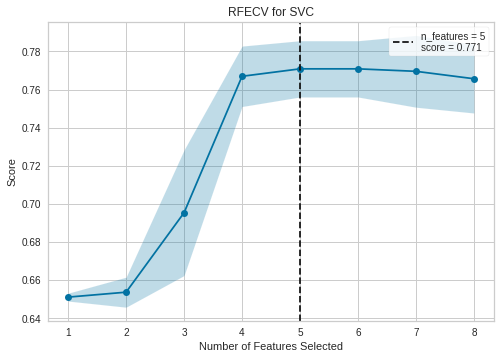

In [33]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

visualizer = RFECV(SVC(kernel='linear', C=1))
visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure